## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Reading Dataset :
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# The number of rows in the dataset is 294478 row 
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
#The number of unique users in the dataset:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [5]:
# The proportion of users converted:
(df.converted == 1).mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# The number of times the new_page and treatment don't match:
n1 = df.query("landing_page == 'new_page' and group != 'treatment'").count()
n2 = df.query("landing_page != 'new_page' and group == 'treatment'").count()
n1+n2

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

In [7]:
# another solution :
df_to_remove = df[(df["group"] == "treatment") ^ (df["landing_page"] =="new_page")]
df_to_remove.count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [8]:
# NO one row has missing value 
df.isnull().values.any() 

False

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Remove the rows where landing_page and group columns don't match 
df2 = df.drop(df[(df["group"] == "treatment") ^ (df["landing_page"] =="new_page")].index ) 
df2.shape

(290585, 5)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
# Number of unique users in df2 :
print ("number of unique users_id :",df2['user_id'].nunique())

number of unique users_id : 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# user id 773192 is repeated in rows 1899 , 2893
df2[df2.duplicated(['user_id'], keep = False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
# Row information for the repeat user_id :
df2[df2['user_id']== 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# Remove one of the rows with a duplicate user_id :
df2=df2.drop(df2[(df2.user_id == 773192) & (df2['timestamp'] == '2017-01-09 05:37:58.781806')].index)
df2[df2['user_id']== 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
# The probability of an individual converting regardless of the page they receive :
converting_individuals = float(df2.query('converted == 1')['user_id'].nunique())
p2 = converting_individuals/float(df2.shape[0])
print("The probability of an individual converting regardless of the page they receive is {0:.2%}".format(p2))

The probability of an individual converting regardless of the page they receive is 11.96%


b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
# The probability of an individual in control group converting regardless of the page they receive:
converting_control_individuals = float(df2.query('converted == 1 and group == "control"')['user_id'].nunique())
control_individuals = float(df2.query('group == "control"')['user_id'].nunique())
cp2 = converting_control_individuals / control_individuals
print(" The probability that individuals in control were converted is {0:.2%}".format(cp2))                           

 The probability that individuals in control were converted is 12.04%


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
# The probability of an individual in treatment group converting regardless of the page they receive:
converting_treatment_individuals = float(df2.query('converted == 1 and group == "treatment"')['user_id'].nunique())
treatment_individuals = float(df2.query('group == "treatment"')['user_id'].nunique())
tp2 = converting_treatment_individuals / treatment_individuals
print(" The probability that individuals in treatment were converted is {0:.2%}".format(tp2))   

 The probability that individuals in treatment were converted is 11.88%


d. What is the probability that an individual received the new page?

In [18]:
# The probability that an individual received the new page :
new_page_individuals = float(df2.query('landing_page == "new_page"')['user_id'].nunique()) 
newpage_p2 = new_page_individuals / float(df2.shape[0])
print("The probability that an individual recieved the new page is {0:.2}".format(newpage_p2)) 

The probability that an individual recieved the new page is 0.5


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer :**

From the above analysis, we can observe that the probability of an individual converting regardless of the page they receive is 11.96%. The probability that individuals in control were converted is 12.04%, and the probability that individuals in treatment were converted is 11.88%. Obviously, from the analysis, they are almost identical to each other; indeed, I think there is insufficient evidence to conclude that the new treatment page leads to more conversions.


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypothesis be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

 Null hypothesis is  $$H0: p_{new} - p_{old} <= 0  $$
 
 Alternative hypothesis is  $$H1: p_{new} - p_{old} > 0 $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
p_new = df2[df2['landing_page']=='new_page']['converted'].mean()

print ("p_new = ",p_new)

p_new =  0.11880806551510564


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
p_old = df2[df2['landing_page']=='old_page']['converted'].mean()

print("p_old =",p_old)

p_old = 0.1203863045004612


c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()
print ("n_new =",n_new)

n_new = 145310


d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique()
print ("n_old =",n_old)

n_old = 145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.choice([1,0], size = n_new , p=(p_new , 1-p_new))
new_page_converted

array([0, 1, 0, ..., 0, 1, 0])

In [24]:
# The probability of new page converted rate
print ("probability of new page converted rate  :", new_page_converted.mean())

probability of new page converted rate  : 0.11867731057738627


f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.choice([1,0], size = n_old , p=(p_old , 1-p_old))
old_page_converted

array([0, 0, 0, ..., 0, 0, 1])

In [26]:
# The probability of old page converted rate
print ("probability of old page converted rate :",old_page_converted.mean())

probability of old page converted rate : 0.12018668171868331


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
new_page_converted.mean() - old_page_converted.mean()

-0.001509371141297039

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [28]:
# Create sampling distribution of difference in proportions  :
p_diffs = []
size = df.shape[0]
for _ in range(10000):
    
    new_page_converted = np.random.binomial(n_new, p_new, 10000)/n_new
    old_page_converted = np.random.binomial(n_old, p_old, 10000)/n_old
    p_diffs = new_page_converted - old_page_converted
    
   

In [29]:
# Store all 10,000 values in a NumPy array called p_diffs :
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

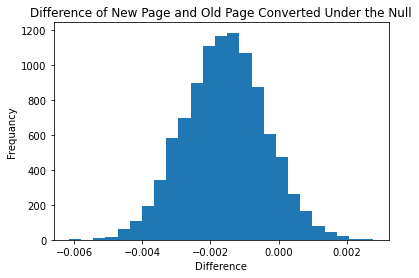

In [30]:
# Histogram of the p_diffs :
plt.hist(p_diffs , bins = 25)
plt.title("Difference of New Page and Old Page Converted Under the Null")
plt.xlabel("Difference")
plt.ylabel("Frequancy")
plt.show();

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
# Compute number of all converted users (new page and old page) users :
convert_new = df2.query('converted == 1 and landing_page =="new_page"')['user_id'].nunique()
convert_old = df2.query('converted == 1 and landing_page =="old_page"')['user_id'].nunique()
print ("convert_new : ",convert_new ,"\nconvert_old :" , convert_old)

convert_new :  17264 
convert_old : 17489


In [32]:
# Compute the actual converted rate :
actual_convert_new = float(convert_new)/ float(n_new) 
actual_convert_old = float(convert_old)/ float(n_old)
print ("actual convert new :", actual_convert_new ,
      "\nactual_convert_old :" , actual_convert_old)

actual convert new : 0.11880806551510564 
actual_convert_old : 0.1203863045004612


In [33]:
# Compute the observed difference in converted rate :
obs_diff = actual_convert_new - actual_convert_old
print ("observed difference :", obs_diff)

observed difference : -0.0015782389853555567


In [34]:
# Create the distribution under the null hypothesis
null_vals = np.random.normal ( 0 , p_diffs.std() , p_diffs.size)

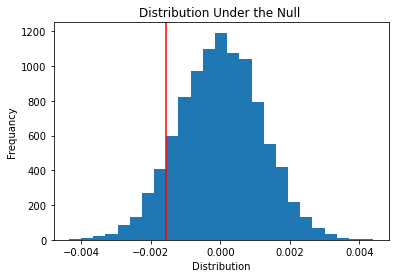

In [35]:
# Histogram for distribution under the null hypothesis
plt.hist(null_vals,bins = 25)
plt.title("Distribution Under the Null ")
plt.xlabel("Distribution")
plt.ylabel("Frequancy")
plt.axvline( x=obs_diff , c='red');

In [36]:
# Compute proportion of the p_diffs are greater than the actual difference observed in ab_data.csv that means computing p_value
print("p_value = ",(null_vals > obs_diff).mean())

p_value =  0.9068


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:**

We have performed statistical computations to prepare the p_diffs (which in scientific studies known as p_value) and the observed difference in converted rate between new and old pages. In scientific studies, p_value is often used to determine the significance of the actual results related to the null hypothesis. Here, the results showed that the p_values is much greater than the actual difference, which is about 0.9061. According to the null hypothesis, the p_value is much greater than 0.05, and thus,  it is not statistically significant and indicates strong evidence for the null hypothesis. This means that there is no difference between the new pages and old pages that means we failed to reject the null values.



l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [37]:
import statsmodels.api as sm

convert_old = len(df2[(df2['landing_page'] =='old_page')&(df2['converted'] == 1)])
convert_new = len(df2[(df2['landing_page'] =='new_page')&(df2['converted'] == 1)])
n_old = len(df2[df2.landing_page =='old_page'])
n_new = len(df2[df2.landing_page =='new_page']) 

In [38]:
print("convert_old:", convert_old, 
      "\nconvert_new:", convert_new,
      "\nn_old:", n_old,
      "\nn_new:", n_new)

convert_old: 17489 
convert_new: 17264 
n_old: 145274 
n_new: 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [39]:
z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old],[n_new,n_old],alternative = 'larger')
print("z-score:", z_score,
     "\np-value:", p_value)

z-score: -1.3109241984234394 
p-value: 0.9050583127590245


In [40]:
# To know how significant z_score is
from scipy.stats import norm

norm.cdf(z_score)

0.09494168724097551

In [41]:
# To know how critical value at 95% confidence is
print("critical value :" , norm.ppf(1-(0.05/2)))

critical value : 1.959963984540054


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer :**


In statistics,  the z-score can be considered a powerful tool for identifying a null hypothesis. The z-scores is a consequence of the pattern analysis, which in combination with the p-value, could tell you whether you can reject that null hypothesis or not. In the current experiment, the z-score is 1.31092, which is associated with a p-value of 0.90505. Comparing with the two-tailed test critical value at 95% confidence (p-value about 0.05) 1.9599, we can conclude that the null hypothesis can not be rejected. This result is agreed with the results obtained in parts J. and K.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer :**

Since the dependent variable is binary (0/ 1) in nature, we have to use Logistic Regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [42]:
# create a column for the intercept , and create a dummy variable column for which page each user received.
df2['intercept'] = 1
df2= df2.join(pd.get_dummies(df2['landing_page']))
df2['ab_page'] = pd.get_dummies(df['group']) ['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [43]:
#Create Logit regression model for two columns
log_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [44]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 11 Apr 2021   Pseudo R-squ.:               8.077e-06
Time:                        15:56:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Answer :**

Logistic regression analysis is used for testing the null hypothesis against the alternative hypothesis. In this experiment, the p_value associated with ab_page is 0.190, which is still larger than the critical value (>0.05). However, the p_value is different from the value found in Part II, it still too high to reject the null hypothesis. The lowering in the p-value here may be due to the adding of the intercept column. It is worth noting here that, in part II one-tailed test has been used to determine the p_value (p_value ~ 0.905 ), whilst in part III two-taled test has been performed yielding a p_value equal to 0.19.


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer :**

Adding more factors that will be effective in the regression model, maybe have some advantages for the analysis. One of the factors that may have some features is the time spent by the customer looking at the page, in which the more time they spent on the page the more they are likely satisfied.
One of the disadvantages that may appear due to adding more factors into the analysis is requiring multiple regression models, which without any theoretical justification may result in an over-fit model.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [45]:
# Reading countries Dataset
country = pd.read_csv('countries.csv')
country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [46]:
# Merge datasets together on the user_id row 
df3 = df2.merge(country , on ='user_id', how='left')
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US


In [47]:
# Check country for unique values
country['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [48]:
# Create dummy variables
df3[['UK','US','CA']] = pd.get_dummies(df3['country'])


In [49]:
#Create intercept variable
df3['intercept'] = 1

#Create Logit regression model for converted and country UK , US and use CA as baseline
logit3 = sm.Logit(df3['converted'], df3[['intercept','UK','US']])
result2 = logit3.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 11 Apr 2021   Pseudo R-squ.:               1.521e-05
Time:                        15:56:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
UK            -0.0408      0.027     -1.518      0.129      -0.093       0.012
US             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

**Answer :**


It seems that including the countries has some bearing on the conversion rate; however, it is not high enough to be statistically significant.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [50]:
# Create new variables (UK_ab_page , US_ab_page , CA_ab_page)

df3['UK_ab_page'] = df3['UK'] * df3['ab_page']
df3['US_ab_page'] = df3['US'] * df3['ab_page']
df3['CA_ab_page'] = df3['CA'] * df3['ab_page']

In [51]:
# Create logit_countries object for converted , ab_page and country UK , US , UK_ab_page , US_ab_page
# and use CA , CA_ab_page  as baseline
logit_countries = sm.Logit(df3['converted'], df3[['intercept','ab_page', 'UK', 'US','UK_ab_page','US_ab_page']])
results3 = logit_countries.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 11 Apr 2021   Pseudo R-squ.:               3.482e-05
Time:                        15:56:31   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
UK            -0.0175      0.038     -0.465      0.642      -0.091       0.056
US            -0.0057      0.019     -0.306      0.760      -0.043       0.031
UK_ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
US_ab_page     0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

When adding everything together it seems that the p-values for all features has increased .

<a id='conclusions'></a>
## Conclusion


The experiment is about performing an A/B test to elucidate the impact of developed a new page for an e-commerce company on the number of users who decide to pay for a company's products. The analysis aims to answer the following question; Should the company implement the new page, keep the old one, or need the experiment to be run longer to decide? In this experiment the null and alternative hypothesis are used. For that, it has been asumed under the null hypothesis that, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. And for alternative hypothesis  $p_{new}$ is greater than $p_{old}$.


The analysis is divided into three main parts:


In part I,  we have performed data analysis for the provided dataset to extract the information required to build our decision. The analysis showed no difference between the conversion rates of new and old pages, and there is insufficient evidence to conclude that the new treatment page leads to more conversions.


In part II, two different methods are used to perform the A/B test, in which the p_value and z-score are calculated in order to identify the null hypothesis.  It is worthing noticing here that the sampling distribution has been performed over 10,000 iterations of calculating an estimate from the null for the difference in the conversation between the two pages. The results from the two methods agreed on the p-value, which is about 0.9. Therefore, according to the null hypothesis, the p_value is much greater than 0.05, and thus,  it is not statistically significant and indicates strong evidence for the null hypothesis. This means that there is no difference between the new pages and old pages that means we failed to reject the null values.


Finally, in part III, the regression approach has been used through a logistic regression model.  In this experiment, the p_value that results from the applying of the logistic regression model is 0.190. Although the p_value is different from the value found in Part II, it still too high to reject the null hypothesis, and so the results provided by the regression model agreed with the results in the A/B test.  Moreover, a new factor has been studied, the countries where the user lives and their effect on the conversion rates. The analysis showed that although the countries' inclusion impacts the conversion rate, it is not high enough to be statistically significant.




In [52]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

1